<a href="https://colab.research.google.com/github/crisouzajr/Estatistica-em-Python/blob/ANOVA-Teste/ANOVA_(F_Teste).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística Preditiva - Teste de Hipótese (ANOVA - F TESTE)

# INTRODUÇÃO

## A análise de variância (ANOVA) pode determinar se as médias de três ou mais grupos são diferentes. A ANOVA usa testes F para testar estatisticamente a igualdade entre médias.

##### OBS: *A diferença básica entre os testes de hipótese e a análise de variância é o número de amostras. Enquanto nos testes de hipótese se trabalha com duas amostras, a ANOVA compara a média de mais de duas amostras e determina se ao menos uma se difere significativamente das demais.*


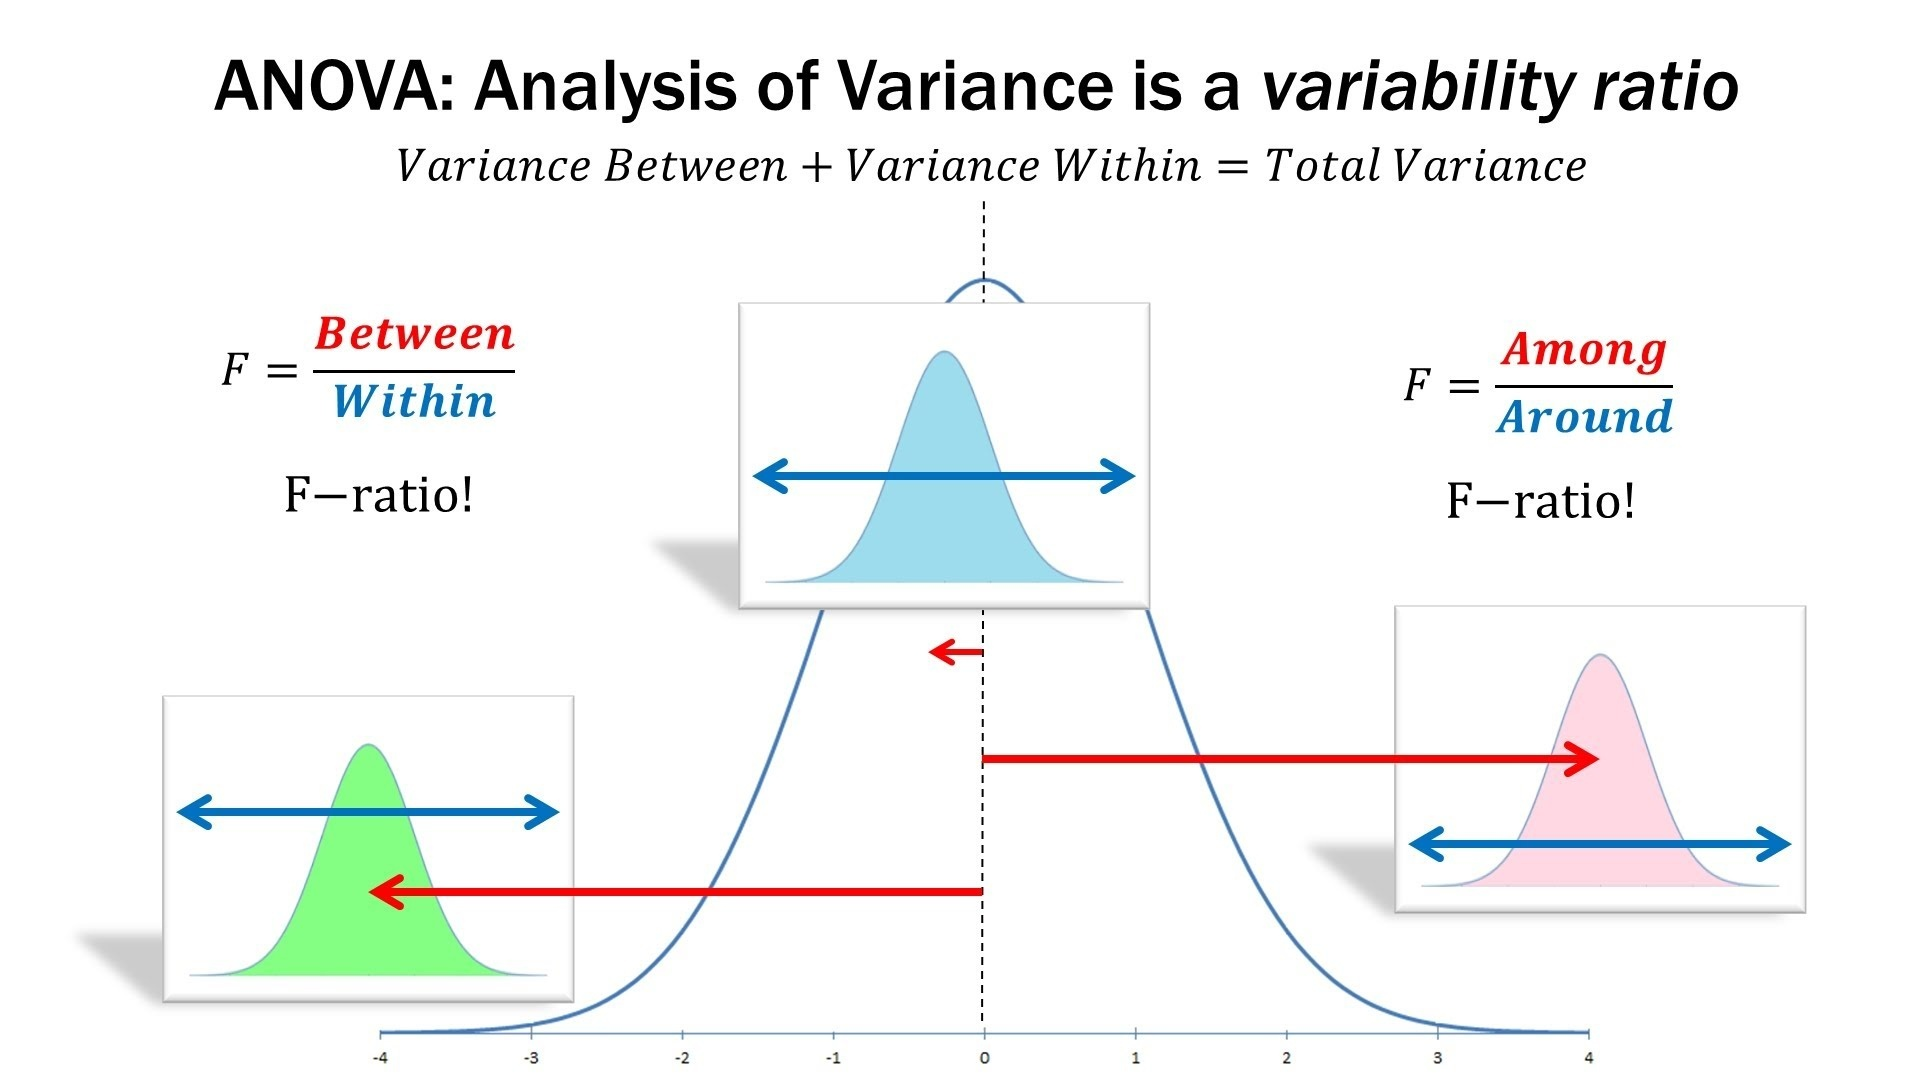

# ANOVA UNIDIRECIONAL 

### Esse tipo de teste informa se dois ou mais grupos são semelhantes ou não com base em sua similaridade média e f-score.

No exemplo prático existem 3 categorias diferentes de plantas e seus respectivos peso, onde é preciso verificar se todos os 3 grupos são semelhantes ou não.

In [ ]:
# Carregando as bibliotecas necessárias.

import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Carregando a base de dados.

df_anova = pd.read_csv('PlantGrowth.csv', delimiter=';')
#df_anova

In [ ]:
# Criando as variáveis que calculas as médias por tipo de planta.

grps = pd.unique(df_anova.group.values)
d_data = {grp:df_anova['weight'][df_anova.group == grp] for grp in grps}

In [ ]:
# Criando a camada que verifica os valores F e p

F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])
print("p-value for significance is: ", p)
print("F for variation in and between samples is: ", F)

p-value for significance is:  0.0159099583256229
F for variation in and between samples is:  4.846087862380136


In [ ]:
# Encontrando as inferências

if p<0.05:
    print("Rejeitamos a hipótese nula.")
else:
    print("Aceitamos a hipótese nula.")

Rejeitamos a hipótese nula.


# ANOVA BIDIRECIONAL 

O teste ANOVA OU F teste de Bidireciona, é uma extensão do teste f de 1 via, é usado quando temos 2 variáveis ​​independentes e 2 ou mais grupos. 

O teste F Bidirecional não informa qual variável é dominante, se precisarmos verificar a significância individual, o teste post-hoc precisa ser realizado.

No exemplo prático iremos analisar qual é o rendimento médio das culturas (o rendimento médio das culturas, não por nenhum subgrupo), bem como o rendimento médio das culturas por cada fator, e pelos fatores agrupados.

In [ ]:
# Carregando as bibliotecas para o estudo

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Fazendo a chamada da base de dados de uma fonte externa.

df_anova2 = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")
#df_anova2

In [ ]:
# Criando uma variável que calcula a regressão linear atribuída as variáveis independentes da base de dados.

model = ols('Yield ~ C(Fert)*C(Water)', df_anova2).fit()
model

In [ ]:
# Vericando os valores de significância e variação entre as médias.

print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 3, 16) =  4.112, p =  0.0243


In [ ]:
# Resultados obtidos a partir das inferências.

"""
sum_sq: Soma dos quadrados para os termos do modelo.

df: Graus de liberdade para os termos do modelo.

F: Valor da estatística F para significância com a  adição de termos ao modelo.

PR(>F): P-value para significância ao adicionar termos ao modelos.

"""
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.766000,0.028847
C(Water),63.368,1.0,5.280667,0.035386
C(Fert):C(Water),15.488,1.0,1.290667,0.272656
Residual,192.000,16.0,NaN,NaN
